# Jeff Myers
# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviro variables
load_dotenv()

True

## Part 1 -  Personal Finance Planner

### Collect Crypto Prices

In [3]:
# import requests and json
import requests
import json

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v1/ticker/"
eth_url = "https://api.alternative.me/v1/ticker/"

In [5]:
# Fetch current BTC price and calculate current BTC of my portfolio
btc_fetch = requests.get(btc_url).json()
btc_value = float(btc_fetch[0]["price_usd"])
my_btc_value = btc_value * my_btc


In [6]:
# Fetch current ETH price and calculate current ETH of my portfolio
eth_fetch = requests.get(eth_url).json()
eth_value = float(eth_fetch[1]["price_usd"])
my_eth_value = eth_value * my_eth


In [7]:
# Print Current Value of my crypto
print(f"The current value of my {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of my {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of my 1.2 BTC is $15726.54
The current value of my 5.3 ETH is $2211.64


### Investment Data Using Alpaca: SPY & AGG

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Format to  current date as ISO format
today = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Current Closing Prices for SPY & AGG

etf_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display Data
etf_portfolio

AGG                                       SPY  \
                             open    high     low    close   volume    open   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309  343.33   

                                                             
                             high     low   close    volume  
2020-10-21 00:00:00-04:00  345.67  342.45  342.69  43419032

In [11]:
# Fetch AGG and SPY close prices

agg_price = float(etf_portfolio["AGG"]["close"])
spy_price = float(etf_portfolio["SPY"]["close"])

# Print AGG & SPY close prices
print(f"Current AGG closing price: ${agg_price:0.2f}")
print(f"Current SPY closing price: ${spy_price:0.2f}")

Current AGG closing price: $117.52
Current SPY closing price: $342.69


In [12]:
# Current value of shares

my_agg_value = my_agg*agg_price
my_spy_value = my_spy*spy_price

# Print Current value of shares
print(f"The current value of my {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of my {my_spy} SPY shares is ${my_spy_value:0.2f}")


The current value of my 200 AGG shares is $23503.00
The current value of my 50 SPY shares is $17134.50


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Savings DataFrame
value_data = {
    "amount":[my_btc_value+my_eth_value, my_agg_value+my_spy_value]
}
# Set index
category = ["crypto", "shares"]

df_savings = pd.DataFrame(value_data, index=category)

# Display
df_savings

,amount
crypto,17938.177
shares,40637.500


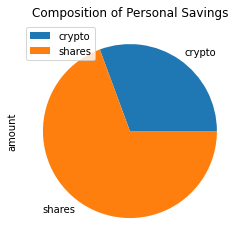

In [14]:
# Plot Savings Pie Chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value+my_eth_value + my_agg_value+my_spy_value

# Shortfall

shortfall = emergency_fund - total_savings

# Validate saving health
if total_savings >= emergency_fund:
    print("Congrats! You have enough money in your emergency fund.")
else:
    print(f"You are $ {shortfall} away from reaching your goal")

Congrats! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set timeframe to '1D'
timeframe = "1D"

# set ticker information

tickers = ["SPY", "AGG"]

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()

In [17]:
# Fetch past 5 years' of data for SPY &  AGG
df_ticker = df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display data
df_ticker.head()


AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723  203.61   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888  206.20   

                                                              
                             high     low   close     volume  
2015-10-21 00:00:00-04:00  203.79  201.65  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344

In [18]:
# Configure Monte Carlo to forecast 30 years cumulative returns, 60% SPY/ 40% AGG

etf_distribution = MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Print sample simulation

etf_distribution.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-21 00:00:00-04:00          NaN  203.61  203.79  201.65  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   

                                                   
                              volume daily_return  
2015-10-21 00:00:00-04:00   83704739          NaN  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884

In [20]:
# Run the Monte Carlo to forecast 30 years of cumulative returns for the blended portfolio
etf_distribution.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997820,1.003572,1.004290,1.002213,0.995270,0.998435,0.994218,1.003302,0.991960,0.995012,...,1.002975,0.992333,1.006842,1.001451,0.989717,0.995507,1.007188,0.995406,1.006927,0.996171
2,0.997062,1.003280,1.007286,0.999940,0.986820,0.994689,0.993222,1.002354,0.997567,0.998494,...,1.002499,0.991676,1.011371,1.002666,0.988459,1.001184,1.006000,0.998336,0.998069,0.993468
3,0.997653,1.006103,1.007187,0.993245,0.976712,0.993890,0.990212,1.001264,0.988677,0.996470,...,1.008116,0.996913,1.007128,1.006789,0.996416,1.001501,1.012146,0.990702,1.003793,0.991585
4,0.993604,1.010848,0.998921,0.985015,0.969417,0.997576,0.990706,0.999862,0.986225,1.001740,...,1.004825,1.003379,1.004223,1.003444,0.994511,0.996157,1.010294,0.997417,1.005853,0.978423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.242193,6.709983,7.969139,5.970324,4.235940,4.147143,4.344131,4.442902,4.996355,5.904748,...,5.083636,6.341483,8.411131,3.658699,9.569479,5.953990,6.067382,3.789596,8.277598,11.162513
7557,3.244713,6.720797,7.908865,5.955474,4.229249,4.123121,4.390455,4.468669,4.960766,5.963492,...,5.081104,6.310847,8.459384,3.649415,9.542877,5.947785,6.048985,3.806442,8.330206,11.257364
7558,3.231896,6.686722,7.973931,5.917539,4.259020,4.094670,4.363220,4.456760,4.989054,5.984569,...,5.102429,6.305664,8.500593,3.648429,9.512937,5.959966,6.068489,3.810292,8.352030,11.231141
7559,3.240858,6.656783,7.952102,5.958954,4.267398,4.095731,4.382358,4.425983,4.995440,5.972000,...,5.090368,6.317191,8.488776,3.646899,9.580990,5.963649,6.095772,3.811758,8.393983,11.284308


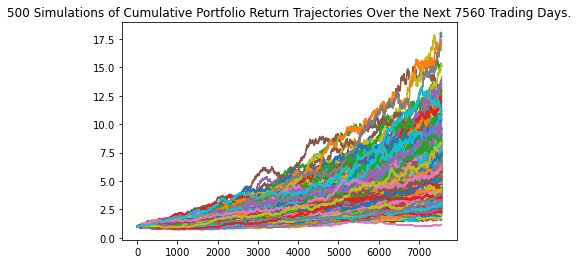

In [21]:
# Plot simulation outcomes
line_plot = etf_distribution.plot_simulation()

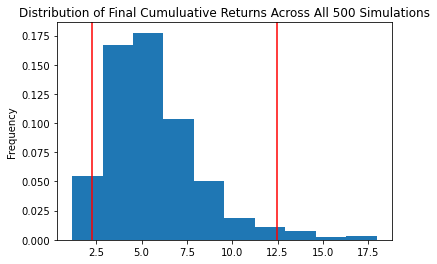

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = etf_distribution.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary stats from the Monte Carlo simulation
etf_summary_tbl = etf_distribution.summarize_cumulative_return()

# Print summary stats
print(etf_summary_tbl)

count           500.000000
mean              5.693177
std               2.581129
min               1.171822
25%               3.887624
50%               5.284751
75%               6.821681
max              17.961229
95% CI Lower      2.258869
95% CI Upper     12.486363
Name: 7560, dtype: float64


###  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [24]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper 95% confidence intervals to calculate the range of outcomes of the $20,000
etf_ci_lower = round(etf_summary_tbl[8]*initial_investment,2)
etf_ci_upper = round(etf_summary_tbl[9]*initial_investment,2)

# Print Results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${etf_ci_lower} and ${etf_ci_upper}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45177.39 and $249727.25.


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
etf_ci_lower = round(etf_summary_tbl[8]*initial_investment,2)
etf_ci_upper = round(etf_summary_tbl[9]*initial_investment,2)

# Print Results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${etf_ci_lower} and ${etf_ci_upper}.")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $67766.08 and $374590.88.
